I first constructed annual CRFs and then calculate the orientation angles between them and ICRF3.

Here I presented the first method, which is that I divided the data annually and run yearly solutions with identical setup.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

# My progs
from my_progs.vlbi.read_sou import read_sou
from my_progs.catalog.read_icrf import read_icrf3
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.stat_func.rms_calc import rms_calc
from tool_func import calc_orient_4_yearly_crf

In [2]:
icrf3sx = read_icrf3(wv="sx")

icrf3def = icrf3sx[icrf3sx["type"] == "D"]

# All sources

In [3]:
years = np.arange(1985, 2020)
num = len(years)

N0 = np.zeros_like(years)
N1 = np.zeros_like(years)
pmt = np.empty((num, 3), dtype=np.float)
err = np.empty((num, 3), dtype=np.float)

In [4]:
for i, year in enumerate(years):
    
    print("\nProcessing", year)
    
    opa = read_sou("../data/yearly/{:d}-y.sou".format(year), drop_few_obs=True)
    
    pos_oft = radio_cat_diff_calc(opa, icrf3sx, sou_name="iers_name")
    
    N0[i], N1[i], pmt[i], err[i] = calc_orient_4_yearly_crf(pos_oft)


Processing 1985
There are 60 sources in the original catalog, 3 (5%) sources with #obs < 3 dropped, leaving 57 sources in the present catalog.

Processing 1986
There are 61 sources in the original catalog, 0 (0%) sources with #obs < 3 dropped, leaving 61 sources in the present catalog.

Processing 1987
There are 192 sources in the original catalog, 15 (8%) sources with #obs < 3 dropped, leaving 177 sources in the present catalog.

Processing 1988
There are 317 sources in the original catalog, 49 (15%) sources with #obs < 3 dropped, leaving 268 sources in the present catalog.

Processing 1989
There are 315 sources in the original catalog, 48 (15%) sources with #obs < 3 dropped, leaving 267 sources in the present catalog.

Processing 1990
There are 427 sources in the original catalog, 46 (11%) sources with #obs < 3 dropped, leaving 381 sources in the present catalog.

Processing 1991
There are 413 sources in the original catalog, 85 (21%) sources with #obs < 3 dropped, leaving 328 sourc

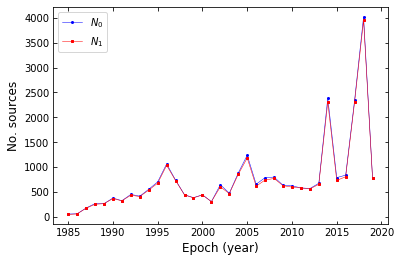

In [5]:
fig, ax = plt.subplots()

ax.plot(years, N0, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

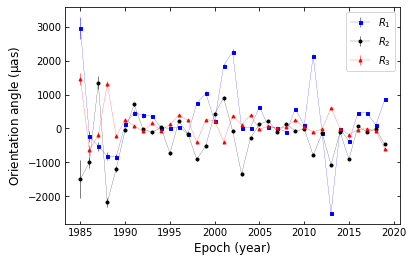

In [6]:
fig, ax = plt.subplots()

ax.errorbar(years, pmt[:,0], yerr=err[:,0], color="blue", 
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years, pmt[:,1], yerr=err[:,1], color="black", 
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years, pmt[:,2], yerr=err[:,2], color="red", 
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

In [7]:
wmean1, wrms1, wstd1 = rms_calc(pmt[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt[:,2])

print("No weighted")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

No weighted
    Mean   RMS  Std
    uas    uas  uas
R1  +292  1004  959
R2  -276   753  699
R3   +95   428  417


In [8]:
wmean1, wrms1, wstd1 = rms_calc(pmt[:,0], err[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt[:,1], err[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt[:,2], err[:,2])

print("Weighted")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Weighted
    Mean  WRMS Std
    uas   uas  uas
R1   +84  354  344
R2   -73  259  249
R3    +8  117  117


# ICRF3 defining sources only

In [9]:
N0_d = np.zeros_like(years)
N1_d = np.zeros_like(years)
pmt_d = np.empty((num, 3), dtype=np.float)
err_d = np.empty((num, 3), dtype=np.float)

In [10]:
for i, year in enumerate(years):
    
    print("\nProcessing", year)
    
    opa = read_sou("../data/yearly/{:d}-y.sou".format(year), drop_few_obs=True)
    
    pos_oft = radio_cat_diff_calc(opa, icrf3def, sou_name="iers_name")
    
    N0_d[i], N1_d[i], pmt_d[i], err_d[i] = calc_orient_4_yearly_crf(pos_oft)


Processing 1985
There are 60 sources in the original catalog, 3 (5%) sources with #obs < 3 dropped, leaving 57 sources in the present catalog.

Processing 1986
There are 61 sources in the original catalog, 0 (0%) sources with #obs < 3 dropped, leaving 61 sources in the present catalog.

Processing 1987
There are 192 sources in the original catalog, 15 (8%) sources with #obs < 3 dropped, leaving 177 sources in the present catalog.

Processing 1988
There are 317 sources in the original catalog, 49 (15%) sources with #obs < 3 dropped, leaving 268 sources in the present catalog.

Processing 1989
There are 315 sources in the original catalog, 48 (15%) sources with #obs < 3 dropped, leaving 267 sources in the present catalog.

Processing 1990
There are 427 sources in the original catalog, 46 (11%) sources with #obs < 3 dropped, leaving 381 sources in the present catalog.

Processing 1991
There are 413 sources in the original catalog, 85 (21%) sources with #obs < 3 dropped, leaving 328 sourc

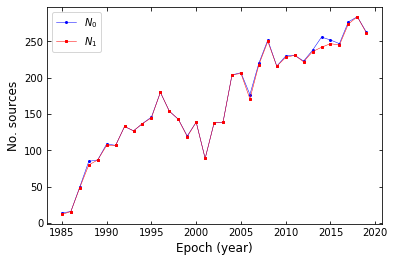

In [11]:
fig, ax = plt.subplots()

ax.plot(years, N0_d, "b-o", ms=2, lw=0.5, label="$N_0$")
ax.plot(years, N1_d, "r-s", ms=2, lw=0.5, label="$N_1$")

# ax.set_yscale("log")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("No. sources", fontsize=12)
ax.legend()

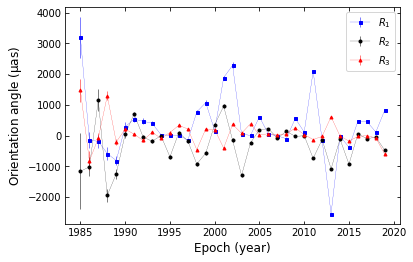

In [12]:
fig, ax = plt.subplots()

ax.errorbar(years, pmt_d[:,0], yerr=err_d[:,0], color="blue", 
            ms=3, fmt="-s", elinewidth=0.5, lw=0.2, label="$R_1$")
ax.errorbar(years, pmt_d[:,1], yerr=err_d[:,1], color="black", 
            ms=3, fmt="-o", elinewidth=0.5, lw=0.2, label="$R_2$")
ax.errorbar(years, pmt_d[:,2], yerr=err_d[:,2], color="red", 
            ms=3, fmt="-^", elinewidth=0.5, lw=0.2, label="$R_3$")

ax.set_xlabel("Epoch (year)", fontsize=12)
ax.set_ylabel("Orientation angle ($\mathrm{\mu as}$)", fontsize=12)
ax.legend()

In [13]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:,2])

print("No weighted")
print("    Mean   RMS  Std")
print("    uas    uas  uas")
print("R1  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:4.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

No weighted
    Mean   RMS  Std
    uas    uas  uas
R1  +324  1021  967
R2  -273   710  653
R3   +77   436  429


In [14]:
wmean1, wrms1, wstd1 = rms_calc(pmt_d[:,0], err_d[:,0])
wmean2, wrms2, wstd2 = rms_calc(pmt_d[:,1], err_d[:,1])
wmean3, wrms3, wstd3 = rms_calc(pmt_d[:,2], err_d[:,2])

print("Weighted")
print("    Mean  WRMS Std")
print("    uas   uas  uas")
print("R1  {:+4.0f}  {:.0f}  {:.0f}".format(wmean1, wrms1, wstd1))
print("R2  {:+4.0f}  {:.0f}  {:.0f}".format(wmean2, wrms2, wstd2))
print("R3  {:+4.0f}  {:.0f}  {:.0f}".format(wmean3, wrms3, wstd3))

Weighted
    Mean  WRMS Std
    uas   uas  uas
R1   +50  525  522
R2  -123  354  332
R3   +21  178  176
